In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams['text.usetex'] = True
# Optional: match font to your LaTeX document
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'  # or other LaTeX packages

In [2]:
attack_durations = pd.read_csv('sparse_counter_config_attack_durations.tsv', delimiter='\t')
random_durations = pd.read_csv('sparse_counter_config_random_durations.tsv', delimiter='\t')

In [3]:
attack_durations.describe()

,Regex ID,Normalised attack duration
count,9667.000000,9667.000000
mean,13897.592118,0.008780
std,8010.125600,0.007509
min,1.000000,0.002322
25%,7067.000000,0.005351
50%,13926.000000,0.005560
75%,20797.000000,0.009381
max,27931.000000,0.170494


In [4]:
random_durations.describe()

,Regex ID,Mean normalised matching duration
count,26759.000000,26759.000000
mean,14217.607908,0.037182
std,8203.850978,0.461043
min,1.000000,0.000000
25%,7119.500000,0.022904
50%,14220.000000,0.030555
75%,21310.500000,0.038510
max,28432.000000,74.312681


In [5]:
combined = pd.merge(random_durations, attack_durations, on='Regex ID')

In [6]:
combined['Slowdown'] = combined['Normalised attack duration'] / combined['Mean normalised matching duration']

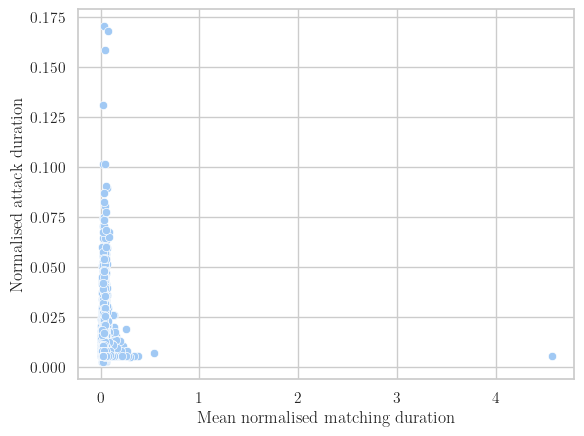

In [7]:
sns.scatterplot(data=combined, x='Mean normalised matching duration', y='Normalised attack duration')
plt.savefig('duration-scatterplot.png')

In [8]:
import numpy as np
combined['Slowdown'] = combined['Slowdown'].replace([np.inf, -np.inf], np.nan)

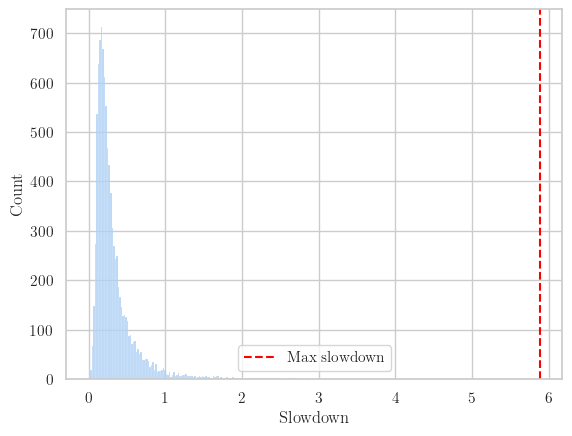

In [11]:
sns.histplot(data=combined, x='Slowdown')
max_slowdown = max(combined['Slowdown'])
plt.axvline(x=max_slowdown, color='red', linestyle='--', label='Max slowdown')
plt.legend()
plt.savefig('slowdown-histplot.png')